<a href="https://colab.research.google.com/github/Rahman17309/ASSIGNMENT1/blob/main/KNN_Zoo_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***`K-NEAREST NEIGHBOURS`***

**Objective:**

The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets
Dataset:

Need to Classify the animal type

**Tasks:**
1. Analyse the data using the visualizations
2. Preprocess the data by handling missing values & Outliers, if any.
3. Split the dataset into training and testing sets (80% training, 20% testing).
4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset
5. Choose an appropriate distance metric and value for K.
6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.
7. Visualize the decision boundaries of the classifier.

**Interview Questions:**
1. What are the key hyperparameters in KNN?
2. What distance metrics can be used in KNN?


Import Libraries:

In [107]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
import plotly.graph_objs as go

from scipy.stats import skew, kurtosis
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from plotly.subplots import make_subplots
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings
# Ignore warnings
warnings.filterwarnings("ignore")

Load the Dataset:

In [108]:
df = pd.read_csv('/content/Zoo.csv')

Understand the Data:

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [110]:
df.shape

(101, 18)

In [111]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


Check for missing values and decide how to handle them:

In [112]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

Check for and handle duplicate rows if present:

In [113]:
df.duplicated().sum()

0

Summary Statistics: Calculate summary statistics to understand the distribution of numerical features.

In [114]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


Visualize Distribution of Numerical Features: Plot histograms plots to visualize the distribution of numerical features.

In [115]:
for col in df.select_dtypes(include=np.number).columns:
    fig = px.histogram(df, x=col, nbins=30, title=f'Distribution of {col}')
    fig.update_layout(xaxis_title=col, yaxis_title='Frequency')
    fig.show()

Visualize Relationships: Explore relationships between variables using scatter plots, pair plots, or heatmaps for correlation.

In [116]:
# Scatter plot matrix
fig = px.scatter_matrix(df, dimensions=df.columns, title='Scatter Plot Matrix')
fig.update_traces(diagonal_visible=False)
fig.show()

In [117]:
# Check for non-numeric values in each column
for col in df.columns:
    non_numeric_values = df[col].apply(lambda x: not pd.to_numeric(x, errors='ignore'))
    if non_numeric_values.any():
        print(f"Column '{col}' contains non-numeric values.")

Column 'hair' contains non-numeric values.
Column 'feathers' contains non-numeric values.
Column 'eggs' contains non-numeric values.
Column 'milk' contains non-numeric values.
Column 'airborne' contains non-numeric values.
Column 'aquatic' contains non-numeric values.
Column 'predator' contains non-numeric values.
Column 'toothed' contains non-numeric values.
Column 'backbone' contains non-numeric values.
Column 'breathes' contains non-numeric values.
Column 'venomous' contains non-numeric values.
Column 'fins' contains non-numeric values.
Column 'legs' contains non-numeric values.
Column 'tail' contains non-numeric values.
Column 'domestic' contains non-numeric values.
Column 'catsize' contains non-numeric values.


In [118]:
df = df.select_dtypes(include=np.number)

In [119]:
df = df.apply(pd.to_numeric, errors='coerce')

In [120]:
correlation_matrix = df.corr()

In [121]:
# Heatmap for correlation
import plotly.figure_factory as ff

correlation_matrix = df.corr()
fig = ff.create_annotated_heatmap(z=correlation_matrix.values,
                                  x=list(correlation_matrix.columns),
                                  y=list(correlation_matrix.index),
                                  colorscale='RdBu',
                                  annotation_text=correlation_matrix.round(2).values,
                                  showscale=True)
fig.update_layout(title='Correlation Matrix',
                  xaxis_title='Features',
                  yaxis_title='Features')
fig.show()

Explore Categorical Variables: Plot count plots or bar plots to explore the distribution of categorical variables.

In [122]:
for col in df.select_dtypes(include='int').columns:
    fig = px.histogram(df, x=col, title=f'Count Plot of {col}')
    fig.update_layout(xaxis_title=col, yaxis_title='Count', xaxis=dict(tickangle=45))
    fig.show()

Only Legs column is differnt from other features, Hence we can do Encoding Techniques on Legs column


Handle Outliers: Identify and handle outliers using visualization techniques like box plots or statistical methods like the Interquartile Range (IQR).

In [123]:
for col in df.select_dtypes(include=np.number).columns:
    fig = px.box(df, y=col, title=f'Boxplot of {col}')
    fig.update_layout(yaxis_title=col, xaxis_title='', showlegend=False)
    fig.show()

No outliers are found

Apply one-hot encoding to the "legs" column

In [124]:
# Apply one-hot encoding to the "legs" column
df_encoded = pd.get_dummies(df, columns=['legs'], prefix='legs')
df_encoded = df_encoded.fillna(0)
df_encoded = df_encoded.astype(int)

# Print the first few rows to verify the encoding
df_encoded.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,tail,domestic,catsize,type,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,1,0,0,1,0,0,1,1,1,1,...,0,0,1,1,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,1,0,1,1,0,0,1,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,1,0,0,4,1,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,1,1,0,0,1,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,1,0,1,1,0,0,1,0,0,0


Rename Dataframe

In [125]:
df1 = df_encoded

In [126]:
df1.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,tail,domestic,catsize,type,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,1,0,0,1,0,0,1,1,1,1,...,0,0,1,1,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,1,0,1,1,0,0,1,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,1,0,0,4,1,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,1,1,0,0,1,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,1,0,1,1,0,0,1,0,0,0


## Split the dataset into training and testing sets (80% training, 20% testing).

In [127]:
# Split the dataset into features (X) and target variable (y)
X = df1.drop(columns=['type'])  # Features
y = df1['type']  # Target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (80, 21) (80,)
Testing set shape: (21, 21) (21,)


## Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

In [128]:
# Initialize the K-Nearest Neighbors classifier with the number of neighbors (k)
knn = KNeighborsClassifier(n_neighbors=2)  # You can adjust the number of neighbors (k) as needed

# Train the KNN classifier on the training dataset
knn.fit(X_train, y_train)

# Predict the target variable for the training set
y_train_pred = knn.predict(X_train)

# Evaluate the accuracy of the KNN classifier on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training set accuracy:", train_accuracy)

Training set accuracy: 0.975


In [129]:
# Generate synthetic data for demonstration
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Initialize the K-Nearest Neighbors classifier with the number of neighbors (k)
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X, y)

# Create a meshgrid of points to create a decision boundary plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and training points
trace1 = go.Contour(x=xx[0], y=yy[:, 0], z=Z,
                    colorscale=[[0, 'rgba(255,0,0,0.2)'], [1, 'rgba(0,0,255,0.2)']],
                    showscale=False)

trace2 = go.Scatter(x=X[:, 0], y=X[:, 1], mode='markers', marker=dict(color=y, colorscale='Bluered', line=dict(color='black', width=1)))

# Create subplot
fig = make_subplots(rows=1, cols=1)

# Add traces
fig.add_trace(trace1)
fig.add_trace(trace2)

# Update layout
fig.update_layout(title='KNN Decision Boundary',
                  xaxis_title='Feature 1',
                  yaxis_title='Feature 2')
fig.show()

Choose an appropriate distance metric and value for K.

In [130]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Values for K
    'metric': ['euclidean', 'manhattan', 'chebyshev']  # Distance metrics to try
}

# Initialize the K-Nearest Neighbors classifier
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best mean cross-validated score
best_score = grid_search.best_score_
print("Best Mean Cross-Validated Score:", best_score)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3}
Best Mean Cross-Validated Score: 0.975


In [131]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Values for K
    'metric': ['euclidean', 'manhattan', 'chebyshev']  # Distance metrics to try
}

# Extract results from the grid search
results = grid_search.cv_results_
mean_scores = results['mean_test_score']
params = results['params']

# Extract parameters and corresponding scores
n_neighbors_values = [params[i]['n_neighbors'] for i in range(len(params))]
metric_values = [params[i]['metric'] for i in range(len(params))]

# Create a 2D grid for heatmap
z = np.array(mean_scores).reshape(len(param_grid['n_neighbors']), len(param_grid['metric']))

# Create heatmap
heatmap = go.Heatmap(z=z,
                     x=param_grid['metric'],
                     y=param_grid['n_neighbors'],
                     colorscale='Viridis')

# Set layout
layout = go.Layout(title='Mean Cross-Validated Scores',
                   xaxis=dict(title='Metric'),
                   yaxis=dict(title='Number of Neighbors'))

# Create figure
fig = go.Figure(data=[heatmap], layout=layout)

# Show interactive plot
fig.show()

the grid search found that the best combination of parameters for your K-Nearest Neighbors classifier is using the Euclidean distance metric and setting the number of neighbors (K) to 3. The best mean cross-validated score achieved with these parameters is 0.975.

can now use these best parameters to train your KNN classifier on the entire training dataset and evaluate its performance on the testing dataset

In [132]:
# Initialize the K-Nearest Neighbors classifier with the best parameters
best_knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

# Train the KNN classifier on the entire training dataset
best_knn.fit(X_train, y_train)

# Predict the target variable for the testing set
y_test_pred = best_knn.predict(X_test)

# Evaluate the accuracy of the KNN classifier on the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing set accuracy:", test_accuracy)

Testing set accuracy: 0.9523809523809523


In [133]:
# Create traces for actual vs. predicted labels
trace_actual = go.Scatter(x=np.arange(len(y_test)), y=y_test, mode='markers', name='Actual', marker=dict(color='blue'))
trace_predicted = go.Scatter(x=np.arange(len(y_test)), y=y_test_pred, mode='markers', name='Predicted', marker=dict(color='red'))

# Create layout
layout = go.Layout(title='Actual vs. Predicted Labels',
                   xaxis=dict(title='Sample Index'),
                   yaxis=dict(title='Class'),
                   showlegend=True)

# Create figure
fig = go.Figure(data=[trace_actual, trace_predicted], layout=layout)

# Show interactive plot
fig.show()

##Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

In [134]:
# Generate classification report
report = classification_report(y_test, y_test_pred)

# Print classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



##Insights:

The classifier performs exceptionally well for classes 1 and 2, achieving perfect precision, recall, and F1-score.

Class 4 has relatively good precision and recall but slightly lower F1-score, indicating that it may be slightly more challenging to predict accurately.

Classes 3, 6, and 7 have very low precision, recall, and F1-score, suggesting that the classifier struggles to predict these classes accurately, possibly due to limited data or class imbalance.

Overall, the classifier demonstrates high accuracy on the testing set, but there may be room for improvement, particularly for classes with low precision, recall, and F1-score. Further investigation into the misclassified instances and potential improvements to the classifier may be warranted.

##Visualize the decision boundaries of the classifier.

Visualizing decision boundaries for high-dimensional data like (22 features) is challenging. However, we can use dimensionality reduction techniques such as Principal Component Analysis (PCA) to reduce the dimensionality of the data and then visualize the decision boundaries in a lower-dimensional space.

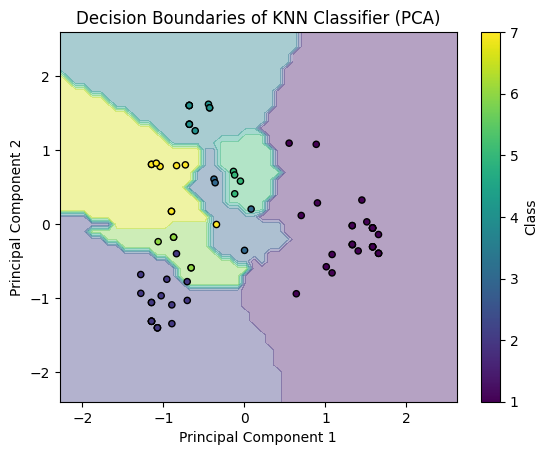

In [135]:
# Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Initialize the K-Nearest Neighbors classifier with the best parameters
best_knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

# Train the KNN classifier on the entire training dataset
best_knn.fit(X_train_pca, y_train)

# Create a meshgrid to plot decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class for each point in the meshgrid
Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=20, edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundaries of KNN Classifier (PCA)')
plt.colorbar(label='Class')
plt.show()

In [136]:
# Create a meshgrid to plot decision boundaries
x_range = np.arange(x_min, x_max, 0.1)
y_range = np.arange(y_min, y_max, 0.1)
xx, yy = np.meshgrid(x_range, y_range)

# Predict the class for each point in the meshgrid
Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create traces for decision boundaries and data points
contour = go.Contour(x=x_range, y=y_range, z=Z, colorscale='Viridis', showscale=False)
scatter = go.Scatter(x=X_train_pca[:, 0], y=X_train_pca[:, 1], mode='markers', marker=dict(color=y_train, size=10, colorscale='Viridis', line=dict(width=1)))

# Create figure object
fig = go.Figure(data=[contour, scatter])

# Add axis labels and title
fig.update_layout(xaxis_title='Principal Component 1', yaxis_title='Principal Component 2', title='Decision Boundaries of KNN Classifier (PCA)')

# Show the plot
fig.show()

# Interview Questions:
##1. What are the key hyperparameters in KNN?

**Key hyperparameters in KNN:**

**n_neighbors:**

This hyperparameter determines the number of neighbors used for classification. A higher value typically leads to smoother decision boundaries but might increase computational complexity.

**weights:**

 This hyperparameter determines the weight function used in prediction. It can be set to 'uniform', where all points in each neighborhood are weighted equally, or 'distance', where closer neighbors have more influence than farther neighbors.

**metric:**

This hyperparameter specifies the distance metric used to measure the distance between points. Common choices include Euclidean distance, Manhattan distance, and Chebyshev distance.

**algorithm:**

This hyperparameter specifies the algorithm used to compute nearest neighbors. Options include 'brute', 'kd_tree', and 'ball_tree', each with its own advantages and disadvantages in terms of speed and memory usage.



##2. What distance metrics can be used in KNN?

**Distance metrics that can be used in KNN:**


**Euclidean distance:**

This is the most common distance metric used in KNN. It calculates the straight-line distance between two points in Euclidean space.


**Manhattan distance:**

 Also known as city block distance or L1 distance, Manhattan distance calculates the distance between two points by summing the absolute differences of their coordinates.

**Chebyshev distance:**

Chebyshev distance calculates the maximum absolute difference between the coordinates of two points along any dimension.

**Minkowski distance:**

Minkowski distance is a generalization of Euclidean and Manhattan distances, where the distance between two points is the nth root of the sum of the absolute differences raised to the power of n. When n=2, it reduces to Euclidean distance, and when n=1, it reduces to Manhattan distance.